<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W4D5_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d milanvaddoriya/data-science-job-salary

  0% 0.00/9.97k [00:00<?, ?B/s]
100% 9.97k/9.97k [00:00<00:00, 18.0MB/s]


In [3]:
!unzip data-science-job-salary.zip

Archive:  data-science-job-salary.zip
  inflating: datascience_salaries.csv  


In [10]:
import pandas as pd
datascience_salaries = pd.read_csv('datascience_salaries.csv')
print(datascience_salaries.head())

   Unnamed: 0       job_title   job_type experience_level       location  \
0           0  Data scientist  Full Time           Senior  New York City   
1           2  Data scientist  Full Time           Senior         Boston   
2           3  Data scientist  Full Time           Senior         London   
3           4  Data scientist  Full Time           Senior         Boston   
4           5  Data scientist  Full Time           Senior  New York City   

  salary_currency  salary  
0             USD  149000  
1             USD  120000  
2             USD   68000  
3             USD  120000  
4             USD  149000  


All data in the table is presented structured/unstructured data, because some of columns include text data.

In [11]:
datascience_salaries.drop_duplicates(inplace=True)
print("\nNumber of duplicate rows after removal:", datascience_salaries.duplicated().sum())


Number of duplicate rows after removal: 0


In [7]:
print(datascience_salaries.isnull().sum())

Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64


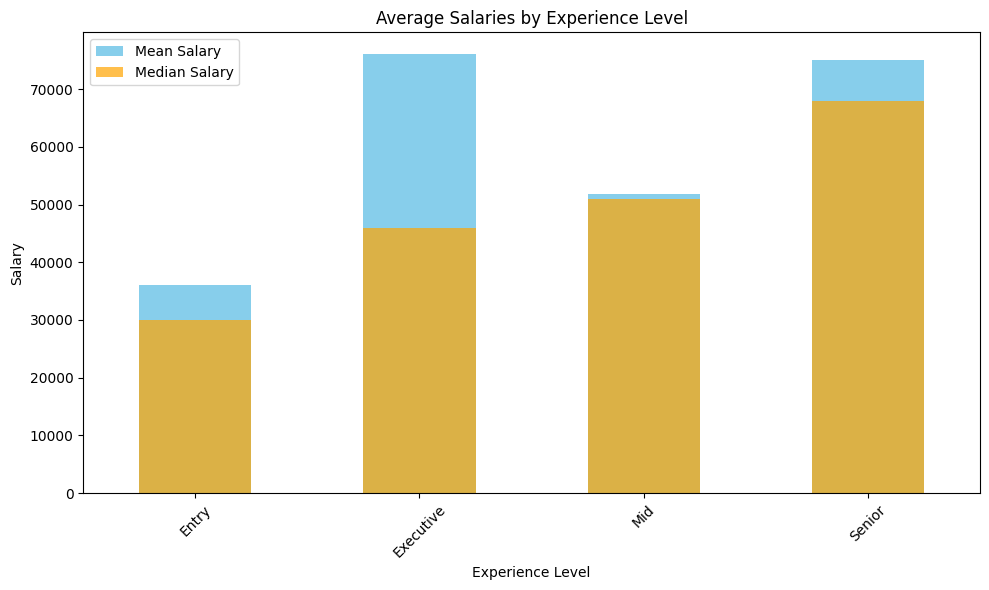

In [12]:
import matplotlib.pyplot as plt
grouped_data = datascience_salaries.groupby('experience_level')['salary'].agg(['mean', 'median'])
plt.figure(figsize=(10, 6))
grouped_data['mean'].plot(kind='bar', color='skyblue', label='Mean Salary')
grouped_data['median'].plot(kind='bar', color='orange', alpha=0.7, label='Median Salary')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Average Salaries by Experience Level')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()